# <span style="color:brown">Medical Cost Personal Insurance Project

<span style="color:blue">****Project Description****

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

<span style="color:blue">Dataset contains following fields

•age: age of primary beneficiary                 
•sex: insurance contractor gender, female, male                                       
•bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.                            
•children: Number of children covered by health insurance / Number of dependents                                  
•smoker: Smoking                                   
•region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.                          
•charges: Individual medical costs billed by health insurance

<span style="color:blue">Predict : Can you accurately predict insurance costs?

# Python Implementation-

<span style="color:red">****Importing Necessary Libraries****

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
#getting last five record
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(1338, 7)

 The columns in the dataset:Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
#chceking the data-types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<span style="color:BLUE">Observation -There are three data types of present in  dataset:(object,float64,int64)

<span style="color:red">****Checking the Null Values****

In [10]:
#checking the null values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

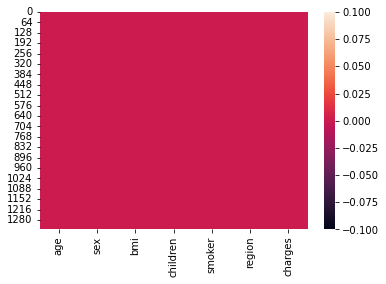

In [11]:
# Lets visualise null values using heatmap
sns.heatmap(df.isnull())

<span style="color:blue">Observation - No null values are present in any column.

<span style="color:red">****Information of  Dataset****

In [12]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<span style="color:blue">Observation - No null values are present in any column but there is possibility of "blankspace" or "whitespace" .
Lets check with value count.

In [13]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

<span style="color:blue">Observation - "blankspace" or "whitespace" are not present in any column.

In [14]:
#checking number of unique value in each column
df.nunique().to_frame("No. of unique value")

,No. of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


<span style="color:red">****Checking Duplicate values****

In [15]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 1


In [16]:
#showing dublicate values
duplicate=df[df.duplicated(keep=False)]

In [17]:
#removing dublicate values
df.drop_duplicates(inplace=True)
#reset the index after removing dublicate values
df.reset_index(drop=True , inplace=True)

In [18]:
#printing dataframe again
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


<span style="color:red">****Description of  Dataset****

In [19]:
#Statistical summary of numerical column
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<span style="color:BLUE">Observation -From the above description , we can observe the following things:                 
    .)No missing values are present in dataset                      
    .)The mean value is greater than median(50%) in "Charge",which means data is skewed right in these.   
     .)There is huge difference in 75% and max value,it means Outliers are present in the dataset.

In [20]:
#Seperating Numerical and Categorical column

#checking for Categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical_column",categorical_col)
print("\n")

#checking for Numerical column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical_column",numerical_col)

categorical_column ['sex', 'smoker', 'region']


Numerical_column ['age', 'bmi', 'children', 'charges']


<span style="color:red">****Converting Cateogrical into Binary number****

In [21]:
# encoding sex column
df.replace({'sex':{'male' : 0,'female': 1}},inplace =True)

# encoding smoker column
df.replace({'smoker':{'yes' : 1 , 'no' : 0}},inplace = True)

# encoding region column
df.replace({'region':{'southeast':0, 'southwest': 1, 'northeast': 2,
                          'northwest': 3}}, inplace = True)

In [22]:
#checking number of unique values in sex column 
df["sex"].value_counts()

0    675
1    662
Name: sex, dtype: int64

In [23]:
#checking number of unique values in sex column 
df["smoker"].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [24]:
#checking number of unique values in sex column 
df["region"].value_counts()

0    364
1    325
3    324
2    324
Name: region, dtype: int64

<span style="color:red">****Data Visualization****

<span style="color:green">****a)Checking Skwewness****

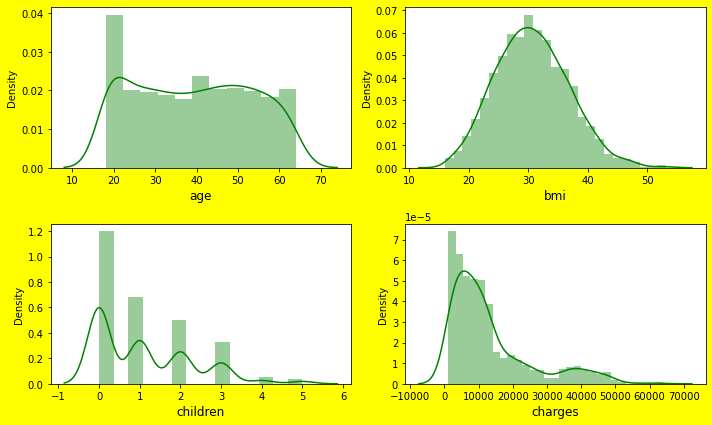

In [25]:
#Checking for data distribution in numerical columns
plt.figure(figsize = (10,6), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in numerical_col:
    if plotnumber <=4: #here 4 is the number of numerical features
        ax = plt.subplot (2,2, plotnumber)
        sns.distplot (df [column],color='g')
        plt.xlabel (column, fontsize =12)
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">Observation - From the above distribution plots, we can notice that data almost looks normal 
except "charges" are sekewed to the right but we do not remove skewness and do not detect outliers from the target variable i.e "charges"

<span style="color:green">****b)Checking Relationship****

<AxesSubplot:xlabel='age', ylabel='charges'>

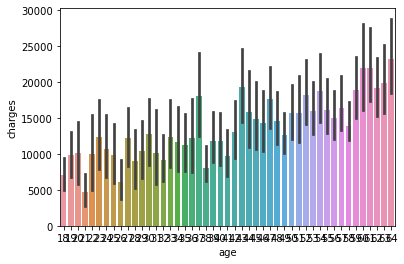

In [26]:
sns.barplot(x="age",y="charges",data=df)

<span style="color:BLUE">Observation -People having greater age spends more on medical cost.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

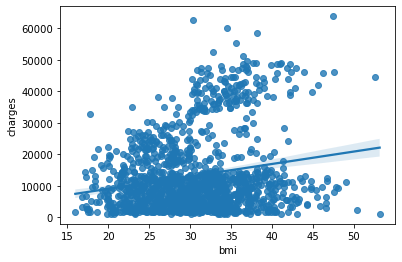

In [27]:
sns.regplot(x="bmi",y="charges",data=df)

<span style="color:BLUE">Observation -People having higher bmi  spends more on medical cost.

<AxesSubplot:xlabel='children', ylabel='charges'>

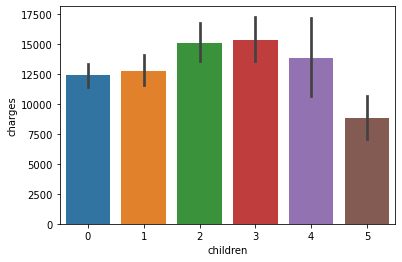

In [28]:
sns.barplot(x="children",y="charges",data=df)

<span style="color:BLUE">Observation -People with five children spends less on medical cost.

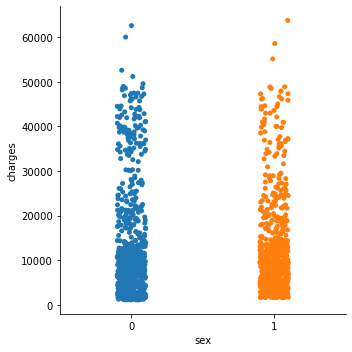

In [29]:
#checking sex and charges
sns.catplot(x="sex",y="charges", data= df)
plt.show()

<span style="color:BLUE">Observation -Charges are not affected by sex(gender).

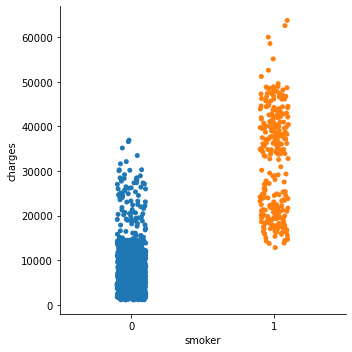

In [30]:
#checking region and charges
sns.catplot(x="smoker",y="charges", data= df)
plt.show()

<span style="color:BLUE">Observation -Smoker spends a lot more on medical cost.

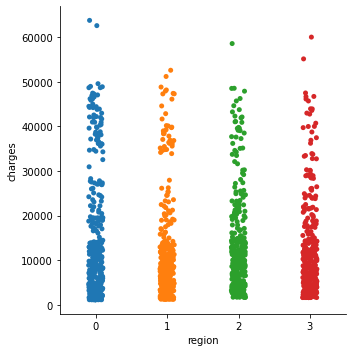

In [31]:
#checking region and charges
sns.catplot(x="region",y="charges", data= df)
plt.show()

<span style="color:BLUE">Observation -we can say that region does not have much impact on medical cost.

<span style="color:green">****c)Checking for outliers****

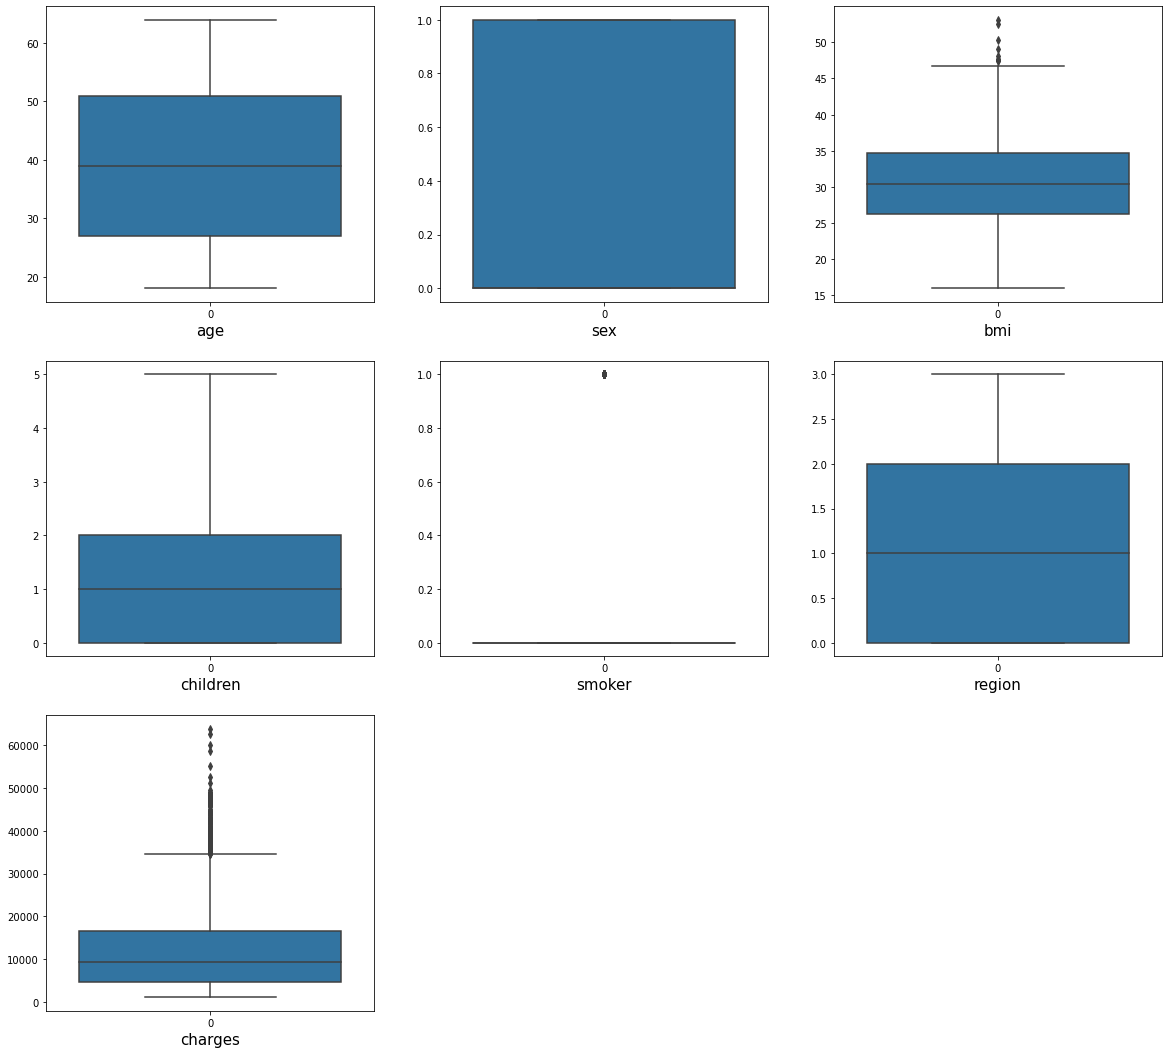

In [32]:
#Checking for outliers
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=8: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

<span style="color:BLUE">Observation -Outliers are present in "bmi" and "charges" but we do not detect or remove outliers from the target variable i.e "charges"

 <span style="color:green">****Removing Outliers by zscore****

z-score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.          
Z score = (x -mean) / std. deviation

In [33]:
from scipy.stats import zscore
outliers_feature=df[["bmi"]]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1332,0.050269
1333,0.206053
1334,1.014490
1335,0.797524


<span style="color:GREEN">In normal distribution, it is estimated that                                         
68% of the data points lie between +/- 1 standard deviation.                                             
95% of the data points lie between +/- 2 standard deviation                                                    
99.7% of the data points lie between +/- 3 standard deviation                             

In [34]:
#Z-score>3
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [35]:
#checkling the value of z^2
print(z.iloc[116,0])
print(z.iloc[846,0])
print(z.iloc[1046,0])
print(z.iloc[1316,0])


3.0167243979459
3.2331821895290602
3.5939451755009926
3.6841359219939767


<span style="color:BLUE">Observation -Here the values are greater than 3.

In [36]:
#now removing the data above zscore and creating a new dataframe
df1=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1.shape)
print("New Dataframe column's name: " ,df1.columns)


New Dataframe having rows and column:  (1333, 7)
New Dataframe column's name:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [37]:
#shape of old and new dataframe
print("OLd Dataframe : " ,df.shape[0])
print("New Dataframe : " ,df1.shape[0])

OLd Dataframe :  1337
New Dataframe :  1333


In [38]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 0.2991772625280479


<span style="color:BLUE">Observation -Accepted Data Loss Percentage is below 10% which is acceptable.

In [39]:
#Storing Dataframe with Z-score method in old dataframe
df=df1

<AxesSubplot:>

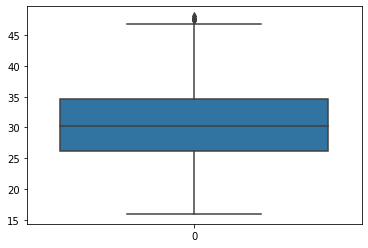

In [40]:
#Checking for outliers in "bmi" column after Z-score method
sns.boxplot (data = df["bmi"])

In [41]:
df.skew()

age         0.052714
sex         0.013519
bmi         0.205541
children    0.934451
smoker      1.464636
region      0.045335
charges     1.517177
dtype: float64

<span style="color:BLUE">Observation -There is no skewness in columns except "children" &"smokers" but "children" &"smokers" are treated as categorical feature .
Hence no need to considered it for skewness.

Default Acceptable range of Skewnesss is (-0.5 to 0.5)

<span style="color:red">****Correlation between target variable and Independent variable****

In [42]:
#checking Correlation 
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.017987,0.118978,0.041406,-0.024390,0.004244,0.300658
sex,0.017987,1.000000,-0.037046,-0.019357,-0.076510,0.013378,-0.057923
bmi,0.118978,-0.037046,1.000000,0.018058,0.002264,-0.253982,0.200868
children,0.041406,-0.019357,0.018058,1.000000,0.006744,0.018353,0.066957
smoker,-0.024390,-0.076510,0.002264,0.006744,1.000000,-0.053247,0.786519
region,0.004244,0.013378,-0.253982,0.018353,-0.053247,1.000000,-0.055878
charges,0.300658,-0.057923,0.200868,0.066957,0.786519,-0.055878,1.000000


<AxesSubplot:>

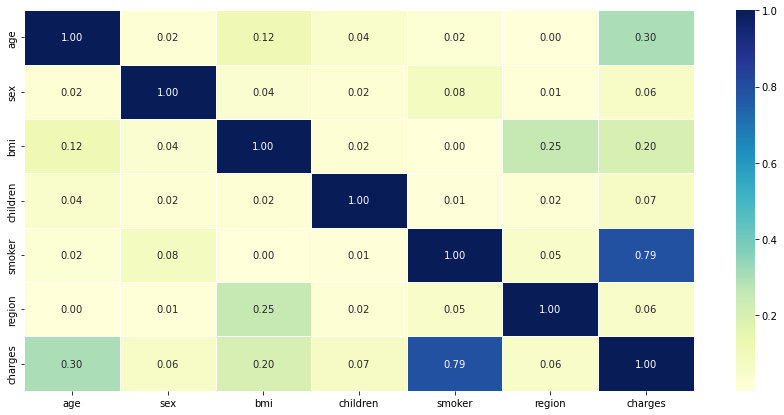

In [43]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

In [44]:
#checking Correlation with "charge" Column
df.corr().charges.sort_values()

sex        -0.057923
region     -0.055878
children    0.066957
bmi         0.200868
age         0.300658
smoker      0.786519
charges     1.000000
Name: charges, dtype: float64

<span style="color:BLUE">Observation -As there is negative correlations of sex,region with charges ,so need to drop these two values.                        
As above data there is no case of multicollinearity.

In [45]:
#Drop sex,region column from dataframe
df=df.drop(["sex","region"],axis=1)
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


<span style="color:BLUE">Observation -smoker , age, bmi  influence charges most.

<span style="color:red">****Seperating Feature and Label**** 

In [46]:
#Seperating Feature and label into x and y
x=df.drop(["charges"],axis=1)
y=df["charges"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (1333, 4)
Target Dimension : (1333,)


<span style="color:red">****Feature Scaling Using Standard Scaler**** 

In [47]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,age,bmi,children,smoker
0,-1.443917,-0.450191,-0.909922,1.970478
1,-1.515225,0.527991,-0.080854,-0.507491
2,-0.802147,0.399678,1.577282,-0.507491
3,-0.445607,-1.315891,-0.909922,-0.507491
4,-0.516915,-0.286883,-0.909922,-0.507491
...,...,...,...,...
1328,0.766626,0.061396,1.577282,-0.507491
1329,-1.515225,0.219705,-0.909922,-0.507491
1330,-1.515225,1.041245,-0.909922,-0.507491
1331,-1.301302,-0.800137,-0.909922,-0.507491


# <span style="color:red">****Modelling**** 

In [48]:
#Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<span style="color:red">****Finding the Best Random State**** 

In [49]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    
    # Split the data into training and testing sets
    x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = i)
    # Loading linear regression model
    lr = LinearRegression()
    # Fit the model on the training data
    lr.fit(x_train, y_train)
    # Predict the target variable for the test data
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 Score is ",maxAccu,"on Random State ",maxRS)      

Maximum R2 Score is  0.7961736387967409 on Random State  145


In [50]:
# Split the data into training and testing sets with best Random State
x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = maxRS)
print("Total Size Of Feature in Dataset :",x_scaled.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (1333, 4)
Total Size Of Training Feature Dataset :  (933, 4)
Total Size Of Testing Feature Dataset :  (400, 4)
Total Size Of Label in Dataset : (1333,)
Total Size Of Training Label Dataset :  (933,)
Total Size Of Testing Label Dataset :  (400,)


# <span style="color:red">****------------------Models--------------------****

# LinearRegression

In [51]:
from sklearn.linear_model import LogisticRegression

LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_LR))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error :",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score : 0.7961736387967409
R2 Score on training data: 72.65918999473956
Mean Absolute Error : 4006.0564729468224
Mean Squared Error : 31962999.89438617
Root Mean Squared Error : 5653.582925401039


# GradientBoostingRegressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train =GBR.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_GBR))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error :",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score : 0.8970822619751274
R2 Score on training data: 89.21800530309669
Mean Absolute Error : 2253.2996288587683
Mean Squared Error : 16139029.467042593
Root Mean Squared Error : 4017.341094186874


# RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_RFR))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error :",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score : 0.8641657571131282
R2 Score on training data: 97.3053713111037
Mean Absolute Error : 2617.295521133833
Mean Squared Error : 21300826.18075845
Root Mean Squared Error : 4615.281809462826


# KNeighborsRegressor as KNN

In [54]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_knn))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error :",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score : 0.8520509797148883
R2 Score on training data: 86.78144629750967
Mean Absolute Error : 2871.8177307225
Mean Squared Error : 23200603.15962677
Root Mean Squared Error : 4816.700443210764


# DecisionTreeRegressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()   
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train =dtr.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_dtr))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error :",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score : 0.7173101734920091
R2 Score on training data: 99.99981669135263
Mean Absolute Error : 3191.6315249725
Mean Squared Error : 44329962.23588805
Root Mean Squared Error : 6658.074964724267


# Support Vector Regression.

In [56]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train =svr.predict(x_train)

print("R2 Score :",r2_score(y_test,pred_svr))
print("R2 Score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error :",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score : -0.06301590695209347
R2 Score on training data: -9.679052988630431
Mean Absolute Error : 8580.191512442445
Mean Squared Error : 166696678.09924722
Root Mean Squared Error : 12911.106772823437


#  <span style="color:green">Clearly GradientBoostingRegressor is the best for this dataset out of all models and has best R2-score of 0.90

# Building a Predictive System

In [58]:
input_data = (33,36.29,3,0)

#changing input_data to numpy array
input_data_as_numpy_array = np.array(input_data)

#reshaping array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = GBR.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[27025.10594662]
The insurance cost is USD  27025.105946615007
